<a href="https://colab.research.google.com/github/shanis345/DeepLearningAI_Mathematics_Specialization/blob/main/04_Logistic_Regression_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4

### <span style="color:chocolate"> Submission requirements </span>

Your work will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:

    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).
---

### Import libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow import keras
from keras import metrics
from keras.datasets import fashion_mnist

tf.get_logger().setLevel('INFO')

---
### Step 1: Data ingestion

You'll train a binary classifier using the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. This consists of 70,000 grayscale images (28x28). Each image is associated with 1 of 10 classes. The dataset was split by the creators; there are 60,000 training images and 10,000 test images. Note also that Tensorflow includes a growing [library of datasets](https://www.tensorflow.org/datasets/catalog/overview) and makes it easy to load them in numpy arrays.

In [2]:
# Load the Fashion MNIST dataset.
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

---
### Step 2: Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) and Data Preprocessing are often iterative processes that involve going back and forth to refine and improve the quality of data analysis and preparation. However, the specific order can vary depending on the project's requirements. In some cases, starting with EDA, as you see in this assignment, could be more useful, but there is no rigid rule dictating the sequence in all situations.

### <span style="color:chocolate">Exercise 1:</span> Getting to know your data (5 points)

Complete the following tasks:

1. Print the shapes and types of (X_train, Y_train) and (X_test, Y_test). Interpret the shapes (i.e., what do the numbers represent?). Hint: For types use the <span style="color:chocolate">type()</span> function.
2. Define a list of strings of class names corresponding to each class in (Y_train, Y_test). Call this list label_names. Hint: Refer to the Fashion MNIST documentation.

In [3]:
# YOUR CODE HERE

# Print the shapes and types of (X_train, Y_train) and (X_test, Y_test)
print("The shape of X_train is ", X_train.shape, " and the type of X_train is ", type(X_train))
print("The shape of Y_train is ", Y_train.shape, " and the type of Y_train is ", type(Y_train))
print("The shape of X_test is ", X_test.shape, " and the type of X_test is ", type(X_test))
print("The shape of Y_test is ", Y_test.shape, " and the type of Y_test is ", type(Y_test))

# Define a list of strings of class names
label_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

The shape of X_train is  (60000, 28, 28)  and the type of X_train is  <class 'numpy.ndarray'>
The shape of Y_train is  (60000,)  and the type of Y_train is  <class 'numpy.ndarray'>
The shape of X_test is  (10000, 28, 28)  and the type of X_test is  <class 'numpy.ndarray'>
The shape of Y_test is  (10000,)  and the type of Y_test is  <class 'numpy.ndarray'>


### <span style="color:chocolate">Exercise 2:</span> Getting to know your data - cont'd (5 points)

Fashion MNIST images have one of 10 possible labels (shown above).

Complete the following tasks:

1. Display the first 5 images in X_train for each class in Y_train, arranged in a 10x5 grid. Use the label_names list defined above;
2. Determine the minimum and maximum pixel values for images in the X_train dataset.

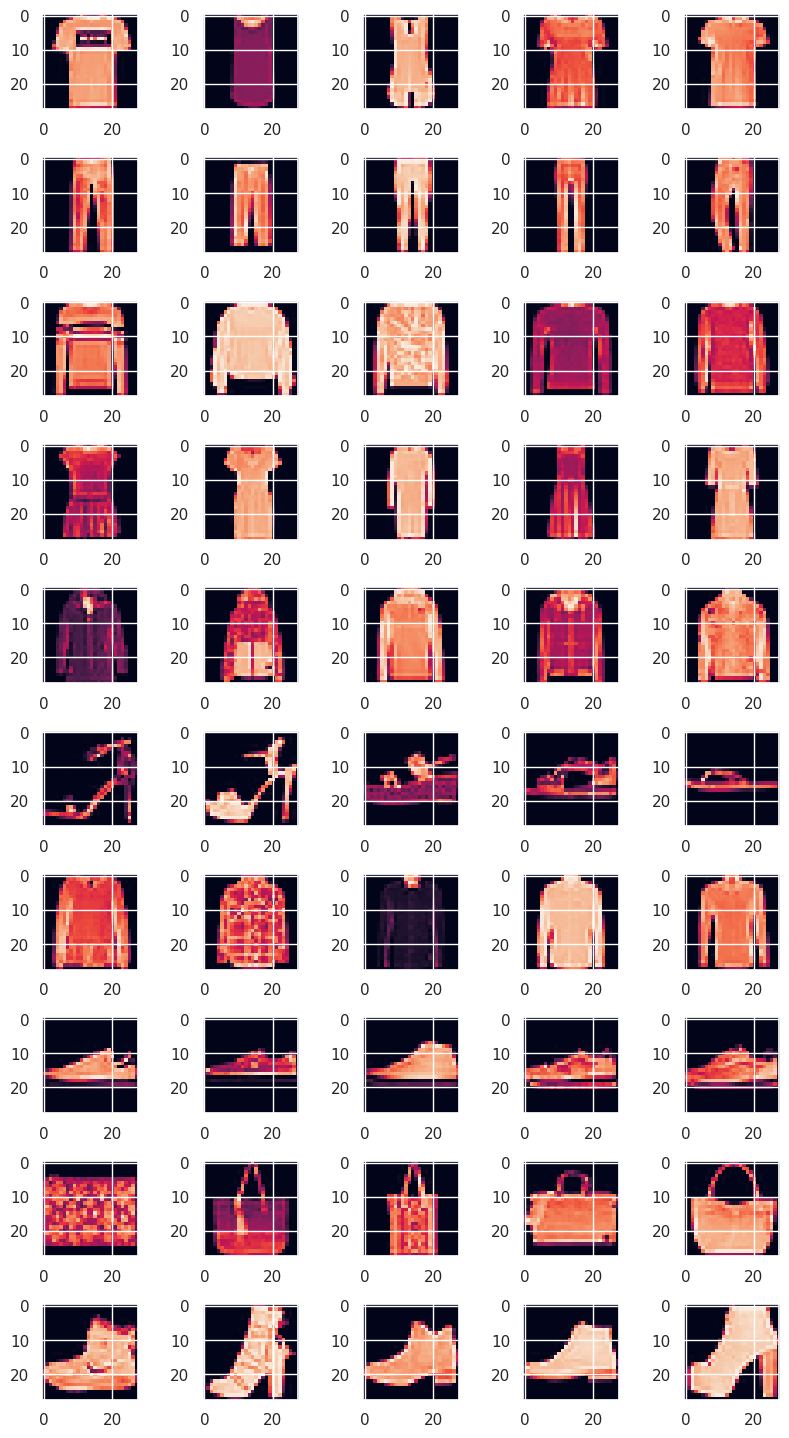

Minimum pixel value:  0
Maximum pixel value:  255


In [4]:
# YOUR CODE HERE

fig, axes = plt.subplots(10, 5, figsize=(10, 18))
fig.subplots_adjust(hspace=0.5)

# Display the first 5 images for each class
for class_label in range(10):
    index = np.where(Y_train == class_label)[0]
    for i in range(5):
        ax = axes[class_label, i]
        ax.imshow(X_train[index[i]])
plt.show()

# Determine the minimum and maximum pixel values for images in the X_train dataset
print("Minimum pixel value: ", np.min(X_train))
print("Maximum pixel value: ", np.max(X_train))

---
### Step 3: Data preprocessing

This step is essential for preparing this image data in a format that is suitable for ML algorithms.

### <span style="color:chocolate">Exercise 3:</span> Feature preprocessing (5 points)

In the previous lab, the input data had just a few features. Here, we treat **every pixel value as a separate feature**, so each input example has 28x28 (784) features!

In this exercise, you'll perform the following tasks:

1. Normalize the pixel values in both X_train and X_test data so they range between 0 and 1;
2. For each image in X_train and X_test, flatten the 2-D 28x28 pixel array to a 1-D array of size 784. Hint: use the <span style="color:chocolate">reshape()</span> method available in NumPy. Note that by doing so you will overwrite the original arrays;
3. Pint the shape of X_train and X_test arrays.

In [5]:
# YOUR CODE HERE

# Normalize the pixel values in both X_train and X_test data so they range between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten the 2D pixel arrays to 1D array of size 784
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

# Print the shape of X_train and X_test arrays
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (60000, 784)
Shape of X_test: (10000, 784)


### <span style="color:chocolate">Exercise 4:</span> Label preprocessing (5 points)

This assignment involves binary classification. Specifically, the objective is to predict whether an image belongs to the sneaker class (class 7) or not.

Therefore, write code so that for each example in (Y_train, Y_test), the outcome variable is represented as follows:
* $y=1$, for sneaker class (positive examples), and
* $y=0$, for non-sneaker class (negative examples).

Note: To avoid "ValueError: assignment destination is read-only", first create a copy of the (Y_train, Y_test) data and call the resulting arrays (Y_train, Y_test). Then overwrite the (Y_train, Y_test) arrays to create binary outcomes.

In [6]:
# Make copies of the original dataset for binary classification task.
Y_train = np.copy(Y_train)
Y_test = np.copy(Y_test)

# YOUR CODE HERE

# Create binary outcome: 1 for sneaker (class 7), 0 for non-sneaker classes
Y_train = np.where(Y_train == 7, 1, 0)
Y_test = np.where(Y_test == 7, 1, 0)


### <span style="color:chocolate">Exercise 5:</span> Data splits (10 points)

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Retain 20% from the training data for validation purposes. Set random state to 1234. All the other arguments of the method are set to default values. Name the resulting dataframes as follows: X_train_mini, X_val, Y_train_mini, Y_val.
2. Print the shape of each array.

In [7]:
# YOUR CODE HERE

X_train_mini, X_val, Y_train_mini, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state= 1234)

print("Shape of X_train_mini: ", X_train_mini.shape)
print("Shape of X_val: ", X_val.shape)
print("Shape of Y_train_mini: ", Y_train_mini.shape)
print("Shape of Y_val: ", Y_val.shape)

Shape of X_train_mini:  (48000, 784)
Shape of X_val:  (12000, 784)
Shape of Y_train_mini:  (48000,)
Shape of Y_val:  (12000,)


### <span style="color:chocolate">Exercise 6:</span> Data shuffling (10 points)

Since you'll be using Batch Gradient Descent (BGD) for training, it is important that **each batch is a random sample of the data** so that the gradient computed is representative.

1. Use [integer array indexing](https://numpy.org/doc/stable/reference/arrays.indexing.html#integer-array-indexing) to re-order (X_train_mini, Y_train_mini) using a list of shuffled indices. In doing so, you will overwrite the arrays.

In [8]:
np.random.seed(0)
# YOUR CODE HERE

# Use np.random.permutation to shuffle indices
# I couldn't get access to the hyperlink so I took the method used from the previous assignment
shuffled_indices = np.random.permutation(len(X_train_mini))

# Use these indices to re-order the training data arrays
X_train_mini = X_train_mini[shuffled_indices]
Y_train_mini = Y_train_mini[shuffled_indices]

---
### Step 4: Exploratory Data Analysis (EDA) - cont'd

Before delving into model training, let's further explore the raw feature values by comparing sneaker and non-sneaker training images.

### <span style="color:chocolate">Exercise 7:</span> Pixel distributions (10 points)

1. Identify all sneaker images in X_train_mini and calculate the mean pixel value for each sneaker image. Visualize these pixel values using a histogram. Print the mean pixel value across all sneaker images.
2. Identify all non-sneaker images in X_train_mini and calculate the mean pixel value for each non-sneaker image. Visualize these pixel values using a histogram. Print the mean pixel value across all non-sneaker images.
3. Based on the histogram results, assess whether there is any evidence suggesting that pixel values can be utilized to distinguish between sneaker and non-sneaker images. Justify your response.

Notes: Make sure to provide a descriptive title and axis labels for each histogran. Make sure you utilize Y_train_mini to locate the sneaker and non-sneaker class.

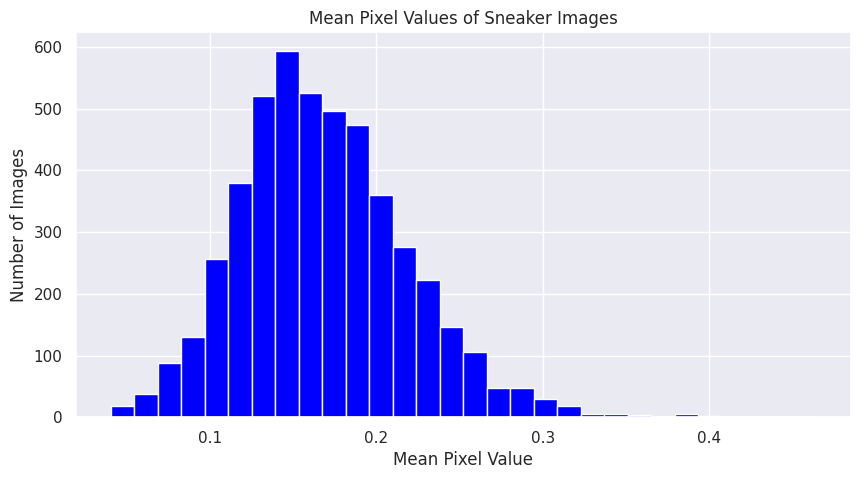

Mean pixel value across all sneaker images:  0.1682747275993731


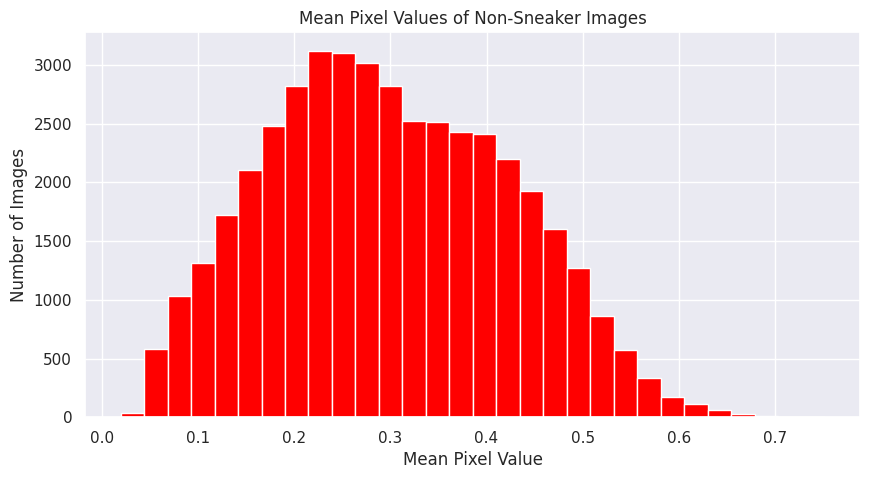

Mean pixel value across all non-sneaker images:  0.2990019268123916


In [9]:
# YOUR CODE HERE

# Identify all sneaker images and calculate the mean pixel value for each sneaker image
sneaker_indices = np.where(Y_train_mini == 1)[0]
sneaker_means = np.mean(X_train_mini[sneaker_indices], axis=1)

# Visualize sneaker mean pixel values using a histogram
plt.figure(figsize=(10, 5))
plt.hist(sneaker_means, bins=30, color='blue')
plt.title('Mean Pixel Values of Sneaker Images')
plt.xlabel('Mean Pixel Value')
plt.ylabel('Number of Images')
plt.grid(True)
plt.show()

# Print the mean pixel value across all sneaker images
mean_sneaker_pixel_value = np.mean(sneaker_means)
print("Mean pixel value across all sneaker images: ", mean_sneaker_pixel_value)

# Identify all non-sneaker images and calculate the mean pixel value for each sneaker image
non_sneaker_indices = np.where(Y_train_mini == 0)[0]
non_sneaker_means = np.mean(X_train_mini[non_sneaker_indices], axis=1)

# Visualize non-sneaker mean pixel values using a histogram
plt.figure(figsize=(10, 5))
plt.hist(non_sneaker_means, bins=30, color='red')
plt.title('Mean Pixel Values of Non-Sneaker Images')
plt.xlabel('Mean Pixel Value')
plt.ylabel('Number of Images')
plt.grid(True)
plt.show()

# Print the mean pixel value across all non-sneaker images
mean_non_sneaker_pixel_value = np.mean(non_sneaker_means)
print("Mean pixel value across all non-sneaker images: ", mean_non_sneaker_pixel_value)

### Answer for Exercise 7
Based on the histograms and mean pixel values across all images, I ran a t-test to determine whether the difference is statistically significant enough to reject the null hypothesis. The null hypothesis in this context is that there is no significant difference between the mean pixel values of sneaker images and non-sneaker images. The t-test result showed a t-statistic of -71 and a very low p-value, which led me to reject the null hypothesis. This indicates that the mean pixel values between the two groups are significantly different. While this suggests that mean pixel value could be a useful feature for distinguishing sneaker images, we need further evaluation to assess its practical effectiveness.

In [10]:
from scipy import stats

# Assuming `sneaker_means` and `non_sneaker_means` are already defined
# and contain the mean pixel values for sneaker and non-sneaker images

# Perform an independent two-sample t-test
t_stat, p_value = stats.ttest_ind(sneaker_means, non_sneaker_means)

# Print the results of the t-test
print(t_stat)
print(p_value)

-71.8473682881871
0.0


---
### Step 4: Modeling

### <span style="color:chocolate">Exercise 8:</span> Baseline model (10 points)

When dealing with classification problems, a simple baseline is to select the *majority* class (the most common label in the training set) and use it as the prediction for all inputs.

With this information in mind:

1. What is the number of sneaker images in Y_train_mini?
2. What is the number of non-sneaker images in Y_train_mini?
3. What is the majority class in Y_train_mini?
4. What is the accuracy of a majority class classifier for Y_train_mini?
5. Implement a function that computes the Log Loss (binary cross-entropy) metric and use it to evaluate this baseline on both the mini train (Y_train_mini) and validation (Y_val) data. Use 0.1 as the predicted probability for your baseline (reflecting what we know about the original distribution of classes in the mini training data). Hint: for additional help, see the file ``04 Logistic Regression with Tensorflow_helpers.ipynb``.

In [11]:
# The number of sneaker/non-sneaker images in Y_train_mini
num_sneakers = np.sum(Y_train_mini == 1)
num_non_sneakers = np.sum(Y_train_mini == 0)

print("Number of sneaker images in Y_train_mini: ", num_sneakers)
print("Number of non-sneaker iamges in Y_train_mini: ", num_non_sneakers)

Number of sneaker images in Y_train_mini:  4800
Number of non-sneaker iamges in Y_train_mini:  43200


### What is the majority class in Y_train_mini?
For the sneaker class, the majority class is 0 (non-sneaker). 90% of the data are non-sneakers and only the remaining 10% are sneaker images

### What is the accuracy of a majority class classifier for Y_train_mini?
Written in the insturction, a simple baseline is to select the majority class (the most common label in the training set) and use it as the prediction for all inputs. Regarding this method, the accuracy of a majority class classifier would be 90%. (If we classify all images as non-sneakers, it would show 90% accuracy)

In [14]:
# YOUR CODE HERE

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the log loss function
def log_loss(y_true, y_pred):
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

# Use the log_loss function to calculate the log loss and print it (predicted probability; 0.1)
loss = log_loss(Y_train_mini, 0.1)
print("Log Loss on training data with predicted probability as 0.1: ", loss)

Log Loss on training data with predicted probability as 0.1:  0.3250829733914482


### <span style="color:chocolate">Exercise 9:</span> Improvement over Baseline with TensorFlow (10 points)

Let's use TensorFlow to train a binary logistic regression model much like you did in the previous assignment. The goal here is to build a ML model to improve over the baseline classifier.

1. Fill in the <span style="color:green">NotImplemented</span> parts of the build_model() function below by following the instructions provided as comments. Hint: the activation function, the loss, and the evaluation metric are different compared to the linear regression model;
2. Build and compile a model using the build_model() function and the (X_train_mini, Y_train_mini) data. Set learning_rate = 0.0001. Call the resulting object *model_tf*.
3. Train *model_tf* using the (X_train_mini, Y_train_mini) data. Set num_epochs = 5 and batch_size=32. Pass the (X_val, Y_val) data for validation. Hint: see the documentation behind the [tf.keras.Model.fit()](https://bcourses.berkeley.edu/courses/1534588/files/88733489?module_item_id=17073646) method.
3. Generate a plot (for the mini training and validation data) with the loss values on the y-axis and the epoch number on the x-axis for visualization. Make sure to include axes name and title. Hint: check what the [tf.keras.Model.fit()](https://bcourses.berkeley.edu/courses/1534588/files/88733489?module_item_id=17073646) method returns.

In [ ]:
def build_model(num_features, learning_rate):
  """Build a TF linear regression model using Keras.

  Args:
    num_features: The number of input features.
    learning_rate: The desired learning rate for SGD.

  Returns:
    model: A tf.keras model (graph).
  """
  # This is not strictly necessary, but each time you build a model, TF adds
  # new nodes (rather than overwriting), so the colab session can end up
  # storing lots of copies of the graph when you only care about the most
  # recent. Also, as there is some randomness built into training with SGD,
  # setting a random seed ensures that results are the same on each identical
  # training run.
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  # Build a model using keras.Sequential. While this is intended for neural
  # networks (which may have multiple layers), we want just a single layer for
  # binary logistic regression.
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      units=NotImplemented,        # output dim
      input_shape=NotImplemented,  # input dim
      use_bias=True,               # use a bias (intercept) param
      activation=NotImplemented,
      kernel_initializer=NotImplemented,  # initialize params to 1
      bias_initializer=NotImplemented,    # initialize bias to 1
  ))

  # We need to choose an optimizer. We'll use SGD, which is actually mini-batch GD
  optimizer = NotImplemented

  # Finally, compile the model. Select the accuracy metric. This finalizes the graph for training.
  NotImplemented

  return model

In [ ]:
tf.random.set_seed(0)
# 2. Build and compile model
# YOUR CODE HERE

# 3. Fit the model
# YOUR CODE HERE

---
### Step 5: Hyperparameter tuning

Hyperparameter tuning is a crucial step in optimizing ML models. It involves systematically adjusting hyperparameters such as learning rate, number of epochs, and optimizer to find the model configuration that leads to the best generalization performance.

This tuning process is typically conducted by monitoring the model's performance on the validation vs. training set. It's important to note that using the test set for hyperparameter tuning can compromise the integrity of the evaluation process by violating the assumption of "blindness" of the test data.

### <span style="color:chocolate">Exercise 10:</span> Hyperparameter tuning (10 points)

1. Fine-tune the **learning rate** and **number of epochs** hyperparameters of *model_tf* to determine the setup that yields the most optimal generalization performance. Feel free to explore various values for these hyperparameters. Hint: you can manually test different hyperparameter values or you can use the [Keras Tuner](https://www.tensorflow.org/tutorials/keras/keras_tuner). If you decide to work with the Keras Tuner, define a new model building function named <span style="color:chocolate">build_model_tuner()</span>.

After identifying your preferred model configuration, print the following information:

2. The first five learned parameters of the model (this should include the bias term);
3. The loss at the final epoch on both the mini training and validation datasets;
4. The percentage difference between the losses observed on the mini training and validation datasets.
5. Compare the training/validation loss of the TensorFlow model (model_tf) with the baseline model's loss. Does the TensorFlow model demonstrate an improvement over the baseline model?


Please note that we will consider 'optimal model configuration' any last-epoch training and validation loss that is below 0.08.

In [ ]:
# YOUR CODE HERE

---
### Step 6: Evaluation and Generalization


Now that you've determined the optimal set of hyperparameters, it's time to evaluate your optimized model on the test data to gauge its performance in real-world scenarios, commonly known as inference.

### <span style="color:chocolate">Exercise 11:</span> Computing accuracy (10 points)

1. Calculate aggregate accuracy on both mini train and test datasets using a probability threshold of 0.5. Hint: You can utilize the <span style="color:chocolate">model.evaluate()</span> method provided by tf.keras. Note: Aggregate accuracy measures the overall correctness of the model across all classes in the dataset;

2. Does the model demonstrate strong aggregate generalization capabilities? Provide an explanation based on your accuracy observations.

In [ ]:
# YOUR CODE HERE

### <span style="color:chocolate">Exercise 12:</span> Fairness evaluation (10 points)

1. Generate and visualize the confusion matrix on the test dataset using a probability threshold of 0.5. Additionally, print the True Positives (TP), False Negatives (FN), False Positives (FP), and True Negatives (TN). Hint: you can utilize the <span style="color:chocolate">model.predict()</span> method available in tf.keras, and then the <span style="color:chocolate">confusion_matrix()</span>, <span style="color:chocolate">ConfusionMatrixDisplay()</span> methods available in sklearn.metrics;

2. Compute subgroup accuracy, separately for the sneaker and non-sneaker classes, on the test dataset using a probability threshold of 0.5. Reflect on any observed accuracy differences (potential lack of fairness) between the two classes.

3. Does the model demonstrate strong subgroup generalization capabilities? Provide an explanation based on your accuracy observations.

In [ ]:
# YOUR CODE HERE

----
#### <span style="color:chocolate">Additional practice question</span> (not graded)

Is it possible to enhance the prediction accuracy for the sneaker class by performing the following steps?

1. Implement data balancing techniques, such as oversampling or undersampling, to equalize the representation of both classes.
2. After balancing the data, retrain the model on the balanced dataset.
3. Evaluate the model's performance, particularly focusing on the accuracy achieved for the sneaker class.